In [31]:
cd /home/ncp/workspace/data

/home/ncp/workspace/data


In [1]:
# basic module
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import shutil
import glob
import time
import pickle

plt.style.use('seaborn-dark')
%config InlineBackend.figure_format = 'retina'
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = False


# image module
import cv2
from pydicom import dcmread
import pylibjpeg
from PIL import Image
import pydicom as dcm
from pydicom import dcmread
from pydicom.data import get_testdata_file

# cd /home/ncp/workspace/data
# dataset
df = pd.read_csv('dataset.csv',index_col=0)

In [2]:
def rv_3ch(og_img_path, mask_path, size):
    
    #module import
    import cv2
    
    # im_read
    og_img = cv2.imread(og_img_path)
    mask = cv2.imread(mask_path)
    
    # clahe
    clahe = cv2.createCLAHE(5.0,(8,8))
    
    ## og_img_convert
    cvt_img = cv2.resize(og_img, size)
    cvt_img = cv2.cvtColor(cvt_img,cv2.COLOR_BGR2GRAY)
    cvt_img = clahe.apply(cvt_img)  # 1 channel
    cvt_img = np.repeat(cvt_img[:,:,np.newaxis],3,-1)

    ## mask
    cvt_mask = cv2.resize(mask, size)
    cvt_mask = cv2.cvtColor(cvt_mask, cv2.COLOR_BGR2GRAY)

    ## remove
    remove = cv2.bitwise_and(cvt_img, cvt_img, mask = cvt_mask)
    
    return remove
#     print(remove.shape)
#     plt.imshow(remove)

In [3]:
df = df.sort_values(by='diagnosis')

In [4]:
d1 = df[df['diagnosis']==1]
d2 = df[df['diagnosis']==2]
d3 = df[df['diagnosis']==3]
d4 = df[df['diagnosis']==4]
d5 = df[df['diagnosis']==5]
d6 = df[df['diagnosis']==6]
d9 = df[df['diagnosis']==9]

In [6]:
def rep(x):
    x = x.replace('.dcm','.png')
    return x

In [37]:
d1img = list(d1['orginal_dcm_file'].apply(lambda x : rep(x)))
d2img = list(d2['orginal_dcm_file'].apply(lambda x : rep(x)))
d3img = list(d3['orginal_dcm_file'].apply(lambda x : rep(x)))
d4img = list(d4['orginal_dcm_file'].apply(lambda x : rep(x)))
d5img = list(d5['orginal_dcm_file'].apply(lambda x : rep(x)))
d6img = list(d6['orginal_dcm_file'].apply(lambda x : rep(x)))
d9img = list(d9['orginal_dcm_file'].apply(lambda x : rep(x)))

In [39]:
d1mask = list(d1['body_part_file'])
d2mask = list(d2['body_part_file'])
d3mask = list(d3['body_part_file'])
d4mask = list(d4['body_part_file'])
d5mask = list(d5['body_part_file'])
d6mask = list(d6['body_part_file'])
d9mask = list(d9['body_part_file'])

In [40]:
img_list = [d1img,d2img,d3img,d4img,d5img,d6img,d9img]
mask_list = [d1mask,d2mask,d3mask,d4mask,d5mask,d6mask,d9mask]

In [86]:
def ch3(og_img_path, mask_path):
    
    #module import
    import cv2
    
    # im_read
    og_img = cv2.imread(og_img_path)
    mask = cv2.imread(mask_path)
    
    # clahe
    clahe = cv2.createCLAHE(5.0,(8,8))
    
    ## og_img_convert
    cvt_img = og_img.copy()
    cvt_img = cv2.cvtColor(cvt_img,cv2.COLOR_BGR2GRAY)
    cvt_img = clahe.apply(cvt_img)  # 1 channel
    cvt_img = np.repeat(cvt_img[:,:,np.newaxis],3,-1)

    ## mask
    cvt_mask = mask.copy()
    cvt_mask = cv2.cvtColor(cvt_mask, cv2.COLOR_BGR2GRAY)

    ## remove
    remove = cv2.bitwise_and(cvt_img, cvt_img, mask = cvt_mask)
    
#     print(remove.shape)
#     plt.imshow(remove)
    return remove


In [164]:
from tqdm import tqdm
correct = []
error = []
a_h = []
for img_path, mask_path in zip(img_list, mask_list):
    for ip, mp in tqdm(zip(img_path,mask_path)):
        try:
            if '01.공기누출' in ip:
                dg = '01.공기누출'
                fdname = 'd1'
            elif '02.과다팽창' in ip:
                dg = '02.과다팽창'
                fdname = 'd2'
            elif '03.무기폐' in ip:
                dg = '03.무기폐' 
                fdname = 'd3'
            elif '04.신생아호흡곤란증후군' in ip:
                dg = '04.신생아호흡곤란증후군'
                fdname = 'd4'
            elif '05.폐렴' in ip:
                dg = '05.폐렴'
                fdname = 'd5'
            elif '06.흉막삼출' in ip:
                dg = '06.흉막삼출'
                fdname = 'd6'
            elif '09.정상' in ip:
                dg = '09.정상'
                fdname = 'd9'
            
            fname = ip.split('train/%s' % dg)[0]+'DL/'+fdname+ip.split('/org')[1]
            
            if ip.split('/org/')[1] in os.listdir(ip.split('train/%s' % dg)[0]+'DL/'+fdname):
                a_h.append(fname)
            else:
                remove = ch3(ip,mp)
                plt.imsave(fname,remove)
                print('없는거 찾았다', fname, '        [완료]')
                correct.append(fname)
        except Exception as e:
            print('\n')
            print(e)
            print(fname,'        [오류]' )
            error.append(ip)

409it [00:00, 4152.22it/s]
124it [00:00, 12751.46it/s]
343it [00:00, 4450.47it/s]
640it [00:00, 2553.30it/s]
493it [00:00, 624.30it/s]



OpenCV(4.5.4) /tmp/pip-req-build-w88qv8vs/opencv/modules/core/src/arithm.cpp:230: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'binary_op'

/home/ncp/workspace/data/DL/d5/H07_01654_01.png         [오류]


1000it [00:01, 897.77it/s]
484it [00:00, 3644.96it/s]
1000it [00:00, 1773.35it/s]


In [155]:
og_img = cv2.imread('/home/ncp/workspace/data/train/05.폐렴/A3.6-10세/H07_01654_01/org/H07_01654_01.png')
mask = cv2.imread('/home/ncp/workspace/data/train/05.폐렴/A3.6-10세/H07_01654_01/mask/H07_01654_01_1.png')
clahe = cv2.createCLAHE(5.0,(8,8))
cvt_img = og_img.copy()
cvt_img = cv2.cvtColor(cvt_img,cv2.COLOR_BGR2GRAY)
cvt_img = clahe.apply(cvt_img)  # 1 channel
cvt_img = np.repeat(cvt_img[:,:,np.newaxis],3,-1)
cvt_mask = mask.copy()

cvt_mask = cv2.resize(cvt_mask,(1776, 2131))
cvt_mask = cv2.cvtColor(cvt_mask, cv2.COLOR_BGR2GRAY)
remove = cv2.bitwise_and(cvt_img, cvt_img, mask = cvt_mask)

In [165]:
plt.imsave('/home/ncp/workspace/data/DL/d5/H07_01654_01.png',remove)

(2131, 1776, 3)

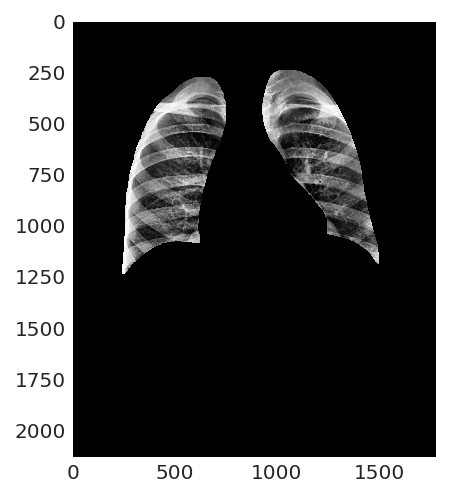

In [166]:
plt.imshow(remove)
remove.shape

In [167]:
f1 = os.listdir('/home/ncp/workspace/data/DL/d1')
f2 = os.listdir('/home/ncp/workspace/data/DL/d2')
f3 = os.listdir('/home/ncp/workspace/data/DL/d3')
f4 = os.listdir('/home/ncp/workspace/data/DL/d4')
f5 = os.listdir('/home/ncp/workspace/data/DL/d5')
f6 = os.listdir('/home/ncp/workspace/data/DL/d6')
f9 = os.listdir('/home/ncp/workspace/data/DL/d9')

In [168]:
len(f1+f2+f3+f4+f5+f6+f9)

4002

In [169]:
flist = [f1,f2,f3,f4,f5,f6,f9]
for i , f in enumerate(flist):
    try:
        if '.ipynb_checkpoints' in f:
            print(i)
    except Exception as e:
        print(e)

2
4


In [109]:
A = cv2.imread('home/ncp/workspace/data/train/05.폐렴/A3.6-10세/H07_01654_01/org/H07_01654_01.dcm')

In [27]:
error = ['/home/ncp/workspace/data/DL/d1/H04_02478_01.png',
 '/home/ncp/workspace/data/DL/d1/H01_00077_01.png',
 '/home/ncp/workspace/data/DL/d1/H04_00255_01.png',
 '/home/ncp/workspace/data/DL/d1/H04_00282_01.png',
 '/home/ncp/workspace/data/DL/d1/H04_00283_02.png',
 '/home/ncp/workspace/data/DL/d1/H04_02490_02.png',
 '/home/ncp/workspace/data/DL/d1/H13_00081_02.png',
 '/home/ncp/workspace/data/DL/d1/H04_02479_02.png',
 '/home/ncp/workspace/data/DL/d2/H04_02146_01.png',
 '/home/ncp/workspace/data/DL/d3/H13_01253_02.png',
 '/home/ncp/workspace/data/DL/d3/H13_01252_01.png',
 '/home/ncp/workspace/data/DL/d3/H13_01792_01.png',
 '/home/ncp/workspace/data/DL/d3/H13_01441_02.png',
 '/home/ncp/workspace/data/DL/d3/H04_01313_01.png',
 '/home/ncp/workspace/data/DL/d4/H04_00133_01.png',
 '/home/ncp/workspace/data/DL/d4/H05_00201_02.png',
 '/home/ncp/workspace/data/DL/d5/H13_00040_01.png',
 '/home/ncp/workspace/data/DL/d6/H05_02284_01.png',
 '/home/ncp/workspace/data/DL/d6/H04_01266_01.png',
 '/home/ncp/workspace/data/DL/d6/H02_01136_01.png',
 '/home/ncp/workspace/data/DL/d6/H02_01137_01.png',
 '/home/ncp/workspace/data/DL/d6/H13_01703_01.png',
 '/home/ncp/workspace/data/DL/d6/H01_01036_01.png',
 '/home/ncp/workspace/data/DL/d6/H13_01393_02.png']

In [32]:
A = []
for err in error:
    a = err.split('DL/')[1].split('.png')[0]
    
    if 'd1' in a:
        c = a.split('d1/')[1]
    elif 'd2' in a:
        c = a.split('d2/')[1]
    elif 'd3' in a:
        c = a.split('d3/')[1]
    elif 'd4' in a:
        c = a.split('d4/')[1]
    elif 'd5' in a:
        c = a.split('d5/')[1]
    elif 'd6' in a:
        c = a.split('d6/')[1]
    elif 'd0' in a:
        c = a.split('d0/')[1]
    
    A.append(c)

In [33]:
A

['H04_02478_01',
 'H01_00077_01',
 'H04_00255_01',
 'H04_00282_01',
 'H04_00283_02',
 'H04_02490_02',
 'H13_00081_02',
 'H04_02479_02',
 'H04_02146_01',
 'H13_01253_02',
 'H13_01252_01',
 'H13_01792_01',
 'H13_01441_02',
 'H04_01313_01',
 'H04_00133_01',
 'H05_00201_02',
 'H13_00040_01',
 'H05_02284_01',
 'H04_01266_01',
 'H02_01136_01',
 'H02_01137_01',
 'H13_01703_01',
 'H01_01036_01',
 'H13_01393_02']

In [98]:
img = []
mask = []
num = []
for find in A:
    img_png = df[df['identifier']==find].loc[int(df[df['identifier']==find].index.values),'orginal_dcm_file'].replace('dcm','png')
    mask_png = df[df['identifier']==find].loc[int(df[df['identifier']==find].index.values),'body_part_file']
    num.append(int(df[df['identifier']==find].index.values))
    img.append(img_png)
    mask.append(mask_png)

In [99]:
num

[2372,
 2293,
 2401,
 2435,
 2370,
 2352,
 2312,
 2474,
 706,
 3864,
 3924,
 3665,
 3699,
 3822,
 267,
 430,
 3267,
 1157,
 791,
 1080,
 1072,
 871,
 1064,
 880]

In [109]:
df.columns

Index(['identifier', 'sex', 'age_group', 'age', 'height', 'weight', 'report',
       'pneumonia_type', 'orginal_dcm_file', 'body_part_file', 'diagnosis'],
      dtype='object')

In [114]:
test_df = pd.DataFrame(columns = df.columns)
for n in num:
    test_df = pd.merge(df.loc[[n]],test_df,how='outer')

In [115]:
df.loc[[n]]

,identifier,sex,age_group,age,height,weight,report,pneumonia_type,orginal_dcm_file,body_part_file,diagnosis
880,H13_01393_02,F,A3,8세,129.0,24.0,Ddx Slightly increased amount of the pleural e...,NaN,/home/ncp/workspace/data/train/06.흉막삼출/A3.6-10...,/home/ncp/workspace/data/train/06.흉막삼출/A3.6-10...,6


In [119]:
cd data

/home/ncp/workspace/data


In [120]:
test_df.to_csv('MASKERROR.csv')

In [84]:
len(img)

24

In [85]:
len(mask)

24

In [87]:
def ch3(og_img_path, mask_path):
    
    #module import
    import cv2
    
    # im_read
    og_img = cv2.imread(og_img_path)
    mask = cv2.imread(mask_path)
    
    # clahe
    clahe = cv2.createCLAHE(5.0,(8,8))
    
    ## og_img_convert
    cvt_img = og_img.copy()
    cvt_img = cv2.cvtColor(cvt_img,cv2.COLOR_BGR2GRAY)
    cvt_img = clahe.apply(cvt_img)  # 1 channel
    cvt_img = np.repeat(cvt_img[:,:,np.newaxis],3,-1)

    ## mask
    cvt_mask = mask.copy()
    cvt_mask = cv2.cvtColor(cvt_mask, cv2.COLOR_BGR2GRAY)

    ## remove
    remove = cv2.bitwise_and(cvt_img, cvt_img, mask = cvt_mask)
    
    print(remove.shape)
    plt.imshow(remove)
    return 


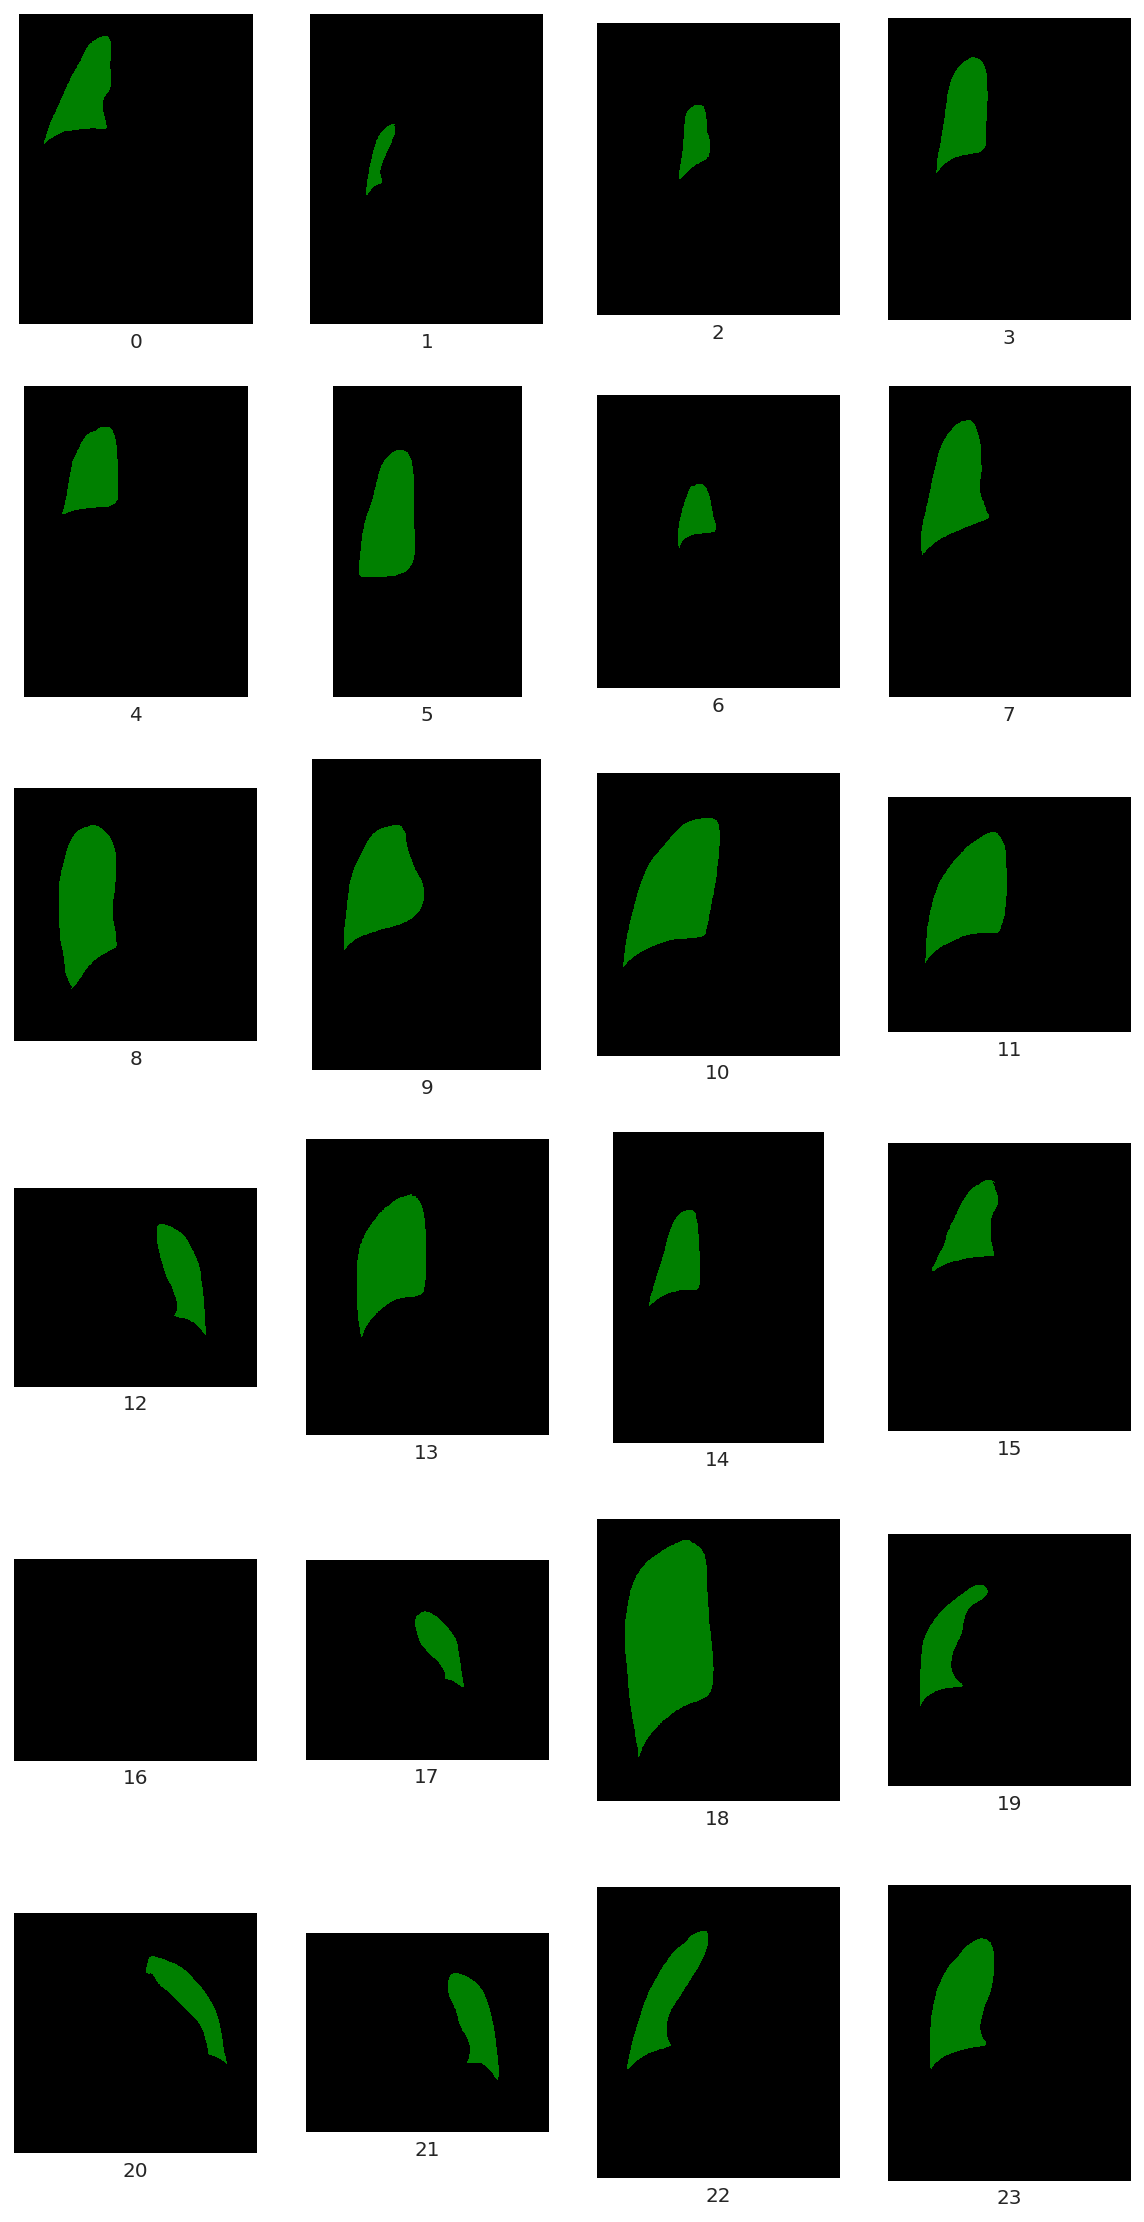

In [91]:
fig = plt.figure(figsize=(10,20))
rows = 6
cols = 4
j = 1 

labels = list(range(25))
for i,im in enumerate(mask):
    img = cv2.imread(im)
    ax = fig.add_subplot(rows,cols,j)
    ax.imshow(img)
    ax.set_xlabel(labels[i])
    ax.set_xticks([]), ax.set_yticks([])
    i += 1
    j += 1

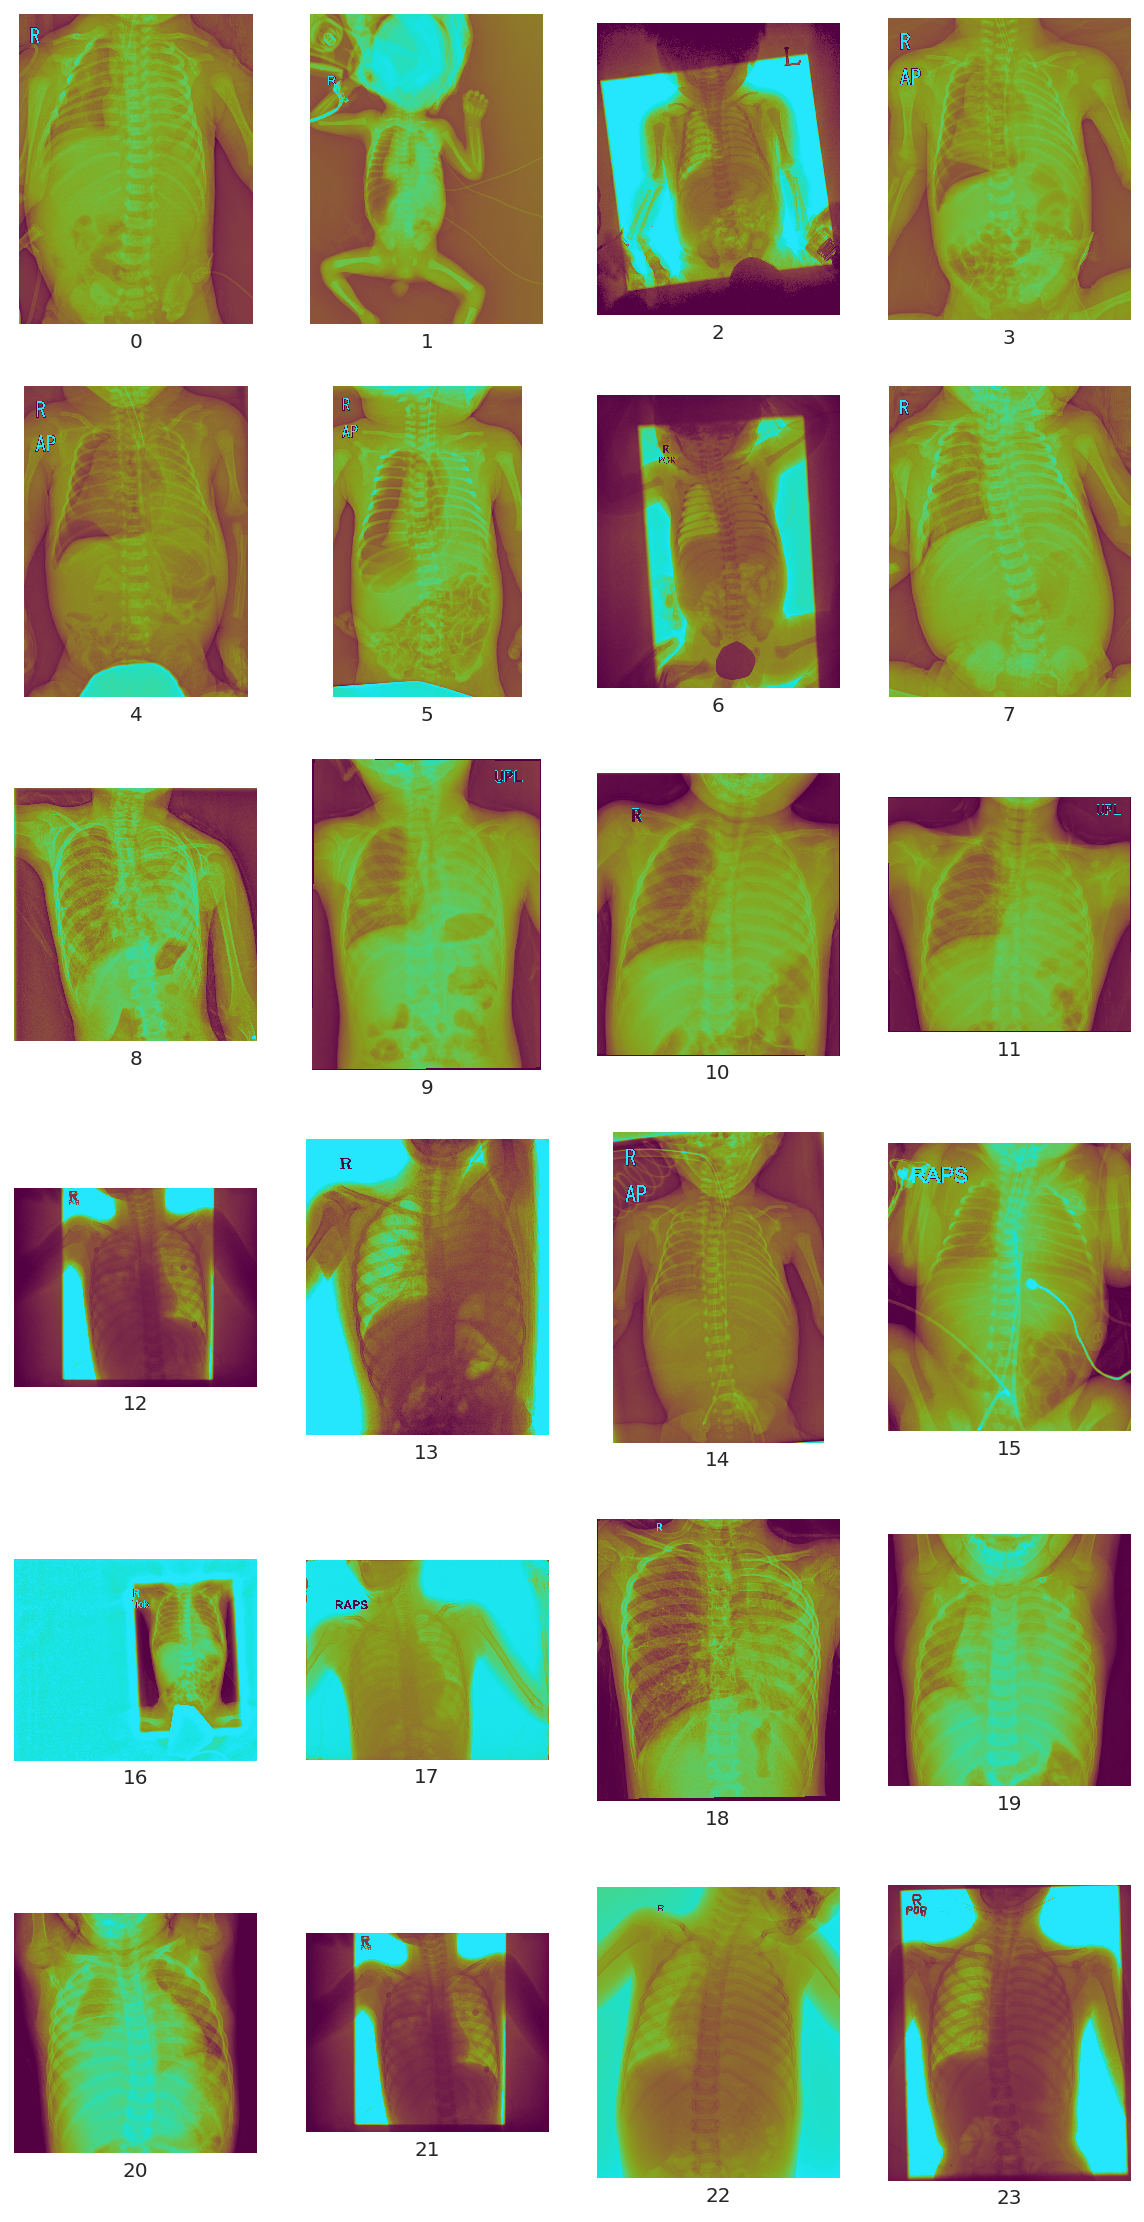

In [96]:
fig = plt.figure(figsize=(10,20))
rows = 6
cols = 4
j = 1 

labels = list(range(25))
for i,im in enumerate(img):
    a = cv2.imread(im)
    ax = fig.add_subplot(rows,cols,j)
    ax.imshow(a)
    ax.set_xlabel(labels[i])
    ax.set_xticks([]), ax.set_yticks([])
    i += 1
    j += 1

(1420, 1068, 3)
(1726, 1294, 3)
(2970, 2460, 3)
(1290, 1036, 3)
(1370, 984, 3)
(1754, 1064, 3)
(2970, 2460, 3)
(1495, 1160, 3)
(2301, 2204, 3)
(2365, 1742, 3)
(1875, 1610, 3)
(2055, 2123, 3)
(2320, 2828, 3)
(2828, 2320, 3)
(1293, 876, 3)
(835, 703, 3)
(1750, 2108, 3)
(1760, 2140, 3)
(1448, 1243, 3)
(1480, 1427, 3)
(1698, 1716, 3)
(2320, 2828, 3)
(2124, 1772, 3)
(2828, 2320, 3)


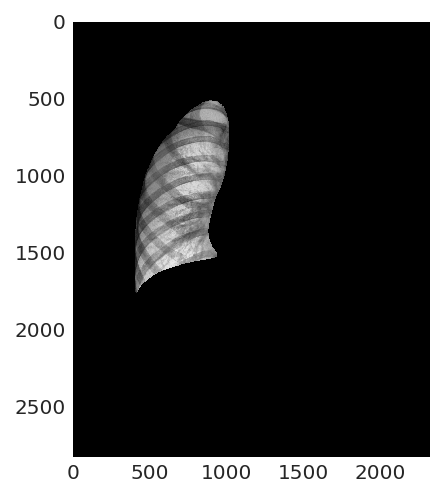

In [88]:
for og_img_path, mask_path in zip(img,mask):
    ch3(og_img_path,mask_path)